In [29]:
import pandas as pd
import seaborn as sns
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train.csv')

In [13]:
aaa = pd.DataFrame(df.isnull().sum())
aaa['test'] = [i+len(df) if i==0 else len(df)-i for i in aaa[0]]

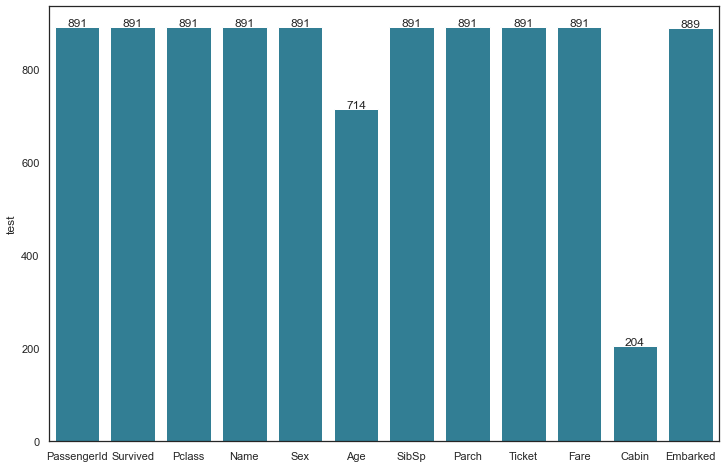

In [14]:
sns.set_style(style='white') 
g = sns.barplot(aaa.index, aaa['test'], color=(0.133, 0.529, 0.643))

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width()/2
            _y = p.get_y() + p.get_height() + 2
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

sns.set(rc={'figure.figsize':(12,8)})
show_values_on_bars(g)

In [5]:
g

In [30]:
dfff = df[['Survived', 'Pclass', 'Sex', 'Embarked']]

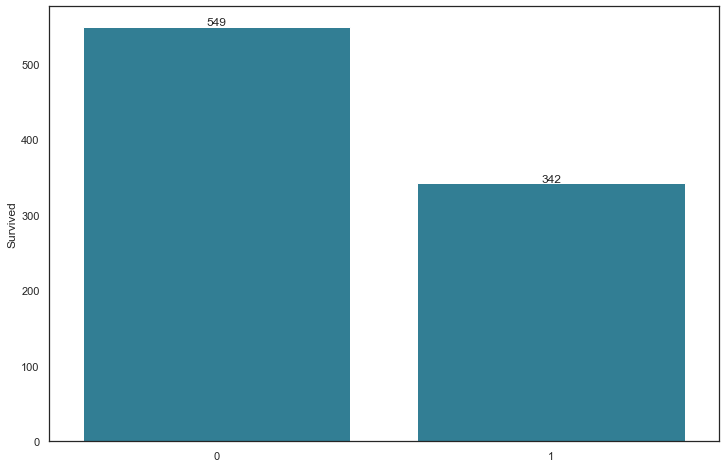

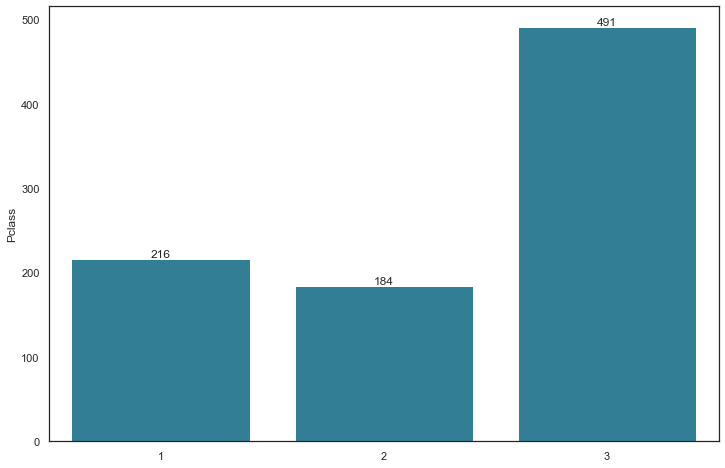

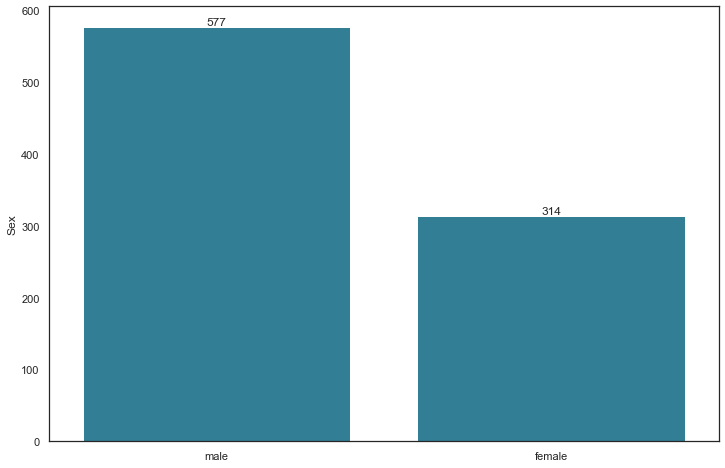

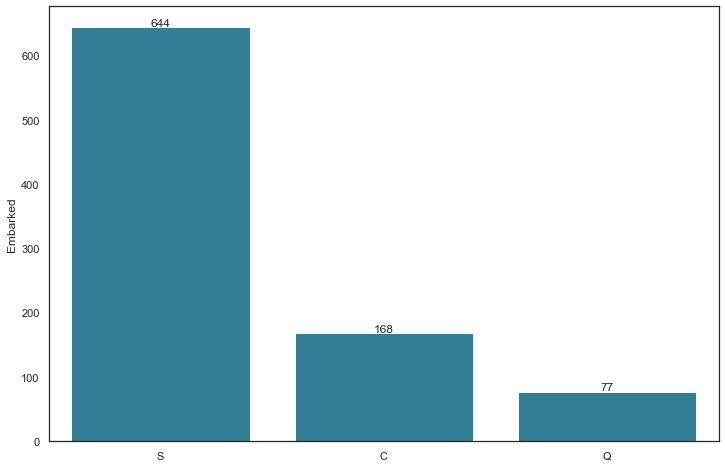

In [46]:
xxx = {}
yyy = {}
for i in dfff.columns:
    ff = pd.DataFrame(dfff[i].value_counts())
    sns.set_style(style='white') 
    h = sns.barplot(ff.index, ff[i], color=(0.133, 0.529, 0.643))
    sns.set(rc={'figure.figsize':(12,8)})
    show_values_on_bars(h)
    xxx[str(i)] = h
    yyy[str(i)] = ff.to_dict()
    plt.show()

In [36]:
xxx

{'Survived': <matplotlib.axes._subplots.AxesSubplot at 0x7fb0945b8310>,
 'Pclass': <matplotlib.axes._subplots.AxesSubplot at 0x7fb0945fc810>,
 'Sex': <matplotlib.axes._subplots.AxesSubplot at 0x7fb0947a58d0>,
 'Embarked': <matplotlib.axes._subplots.AxesSubplot at 0x7fb094952890>}

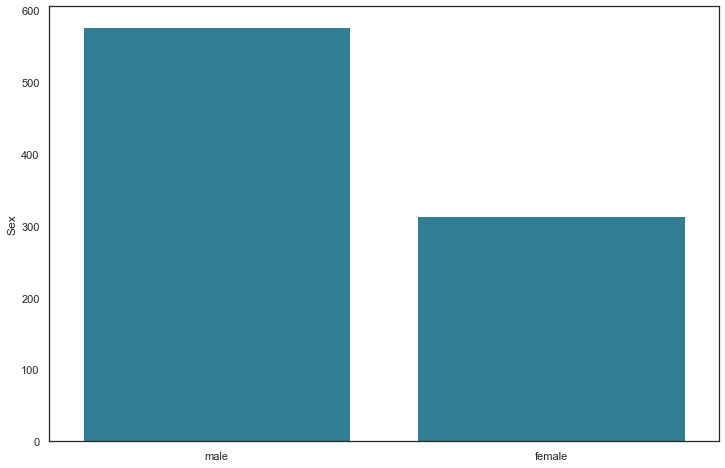

In [40]:
xxx['Sex'].get_figure()

In [47]:
yyy

{'Survived': {'Survived': {0: 549, 1: 342}},
 'Pclass': {'Pclass': {3: 491, 1: 216, 2: 184}},
 'Sex': {'Sex': {'male': 577, 'female': 314}},
 'Embarked': {'Embarked': {'S': 644, 'C': 168, 'Q': 77}}}

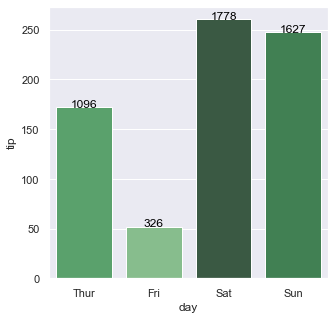

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset("tips")
groupedvalues=df.groupby('day').sum().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
rank = groupedvalues["total_bill"].argsort().argsort() 
fig = plt.figure(figsize=(5,5))
g=sns.barplot(x='day',y='tip',data=groupedvalues, palette=np.array(pal[::-1])[rank])

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill), color='black', ha="center")

g.get_figure().savefig('correlation_histogram.png')

In [41]:
groupedvalues

,day,total_bill,tip,size
0,Thur,1096.33,171.83,152
1,Fri,325.88,51.96,40
2,Sat,1778.40,260.40,219
3,Sun,1627.16,247.39,216
